# 이진분류 경진대회 두번째

## 1.1 데이터를 둘러보자

In [1]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/cat-in-the-dat-ii/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [2]:
train.shape, test.shape

((600000, 24), (400000, 23))

In [3]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 0 to 599999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bin_0   582106 non-null  float64
 1   bin_1   581997 non-null  float64
 2   bin_2   582070 non-null  float64
 3   bin_3   581986 non-null  object 
 4   bin_4   581953 non-null  object 
 5   nom_0   581748 non-null  object 
 6   nom_1   581844 non-null  object 
 7   nom_2   581965 non-null  object 
 8   nom_3   581879 non-null  object 
 9   nom_4   581965 non-null  object 
 10  nom_5   582222 non-null  object 
 11  nom_6   581869 non-null  object 
 12  nom_7   581997 non-null  object 
 13  nom_8   582245 non-null  object 
 14  nom_9   581927 non-null  object 
 15  ord_0   581712 non-null  float64
 16  ord_1   581959 non-null  object 
 17  ord_2   581925 non-null  object 
 18  ord_3   582084 non-null  object 
 19  ord_4   582070 non-null  object 
 20  ord_5   582287 non-null  object 
 21  day     582048 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, 600000 to 999999
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bin_0   388099 non-null  float64
 1   bin_1   387962 non-null  float64
 2   bin_2   388028 non-null  float64
 3   bin_3   388049 non-null  object 
 4   bin_4   388049 non-null  object 
 5   nom_0   387938 non-null  object 
 6   nom_1   388053 non-null  object 
 7   nom_2   387821 non-null  object 
 8   nom_3   387824 non-null  object 
 9   nom_4   388007 non-null  object 
 10  nom_5   388088 non-null  object 
 11  nom_6   387988 non-null  object 
 12  nom_7   387997 non-null  object 
 13  nom_8   388044 non-null  object 
 14  nom_9   387940 non-null  object 
 15  ord_0   388107 non-null  float64
 16  ord_1   387833 non-null  object 
 17  ord_2   387895 non-null  object 
 18  ord_3   387947 non-null  object 
 19  ord_4   388067 non-null  object 
 20  ord_5   387953 non-null  object 
 21  day     38

In [6]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, 600000 to 999999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  400000 non-null  float64
dtypes: float64(1)
memory usage: 6.1 MB


In [7]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train)

데이터 세트 형상: (600000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,float64,17894,2,0.0,1.0,0.0
1,bin_1,float64,18003,2,0.0,1.0,1.0
2,bin_2,float64,17930,2,0.0,0.0,0.0
3,bin_3,object,18014,2,F,F,F
4,bin_4,object,18047,2,N,Y,N
5,nom_0,object,18252,3,Red,Red,Red
6,nom_1,object,18156,6,Trapezoid,Star,NaN
7,nom_2,object,18035,6,Hamster,Axolotl,Hamster
8,nom_3,object,18121,6,Russia,NaN,Canada
9,nom_4,object,18035,4,Bassoon,Theremin,Bassoon


In [8]:
def fill(df,feature,g):
    df[feature] = df[feature].fillna(g)
    
    return df

fe = ['bin_0' ,'bin_1','bin_2','bin_3','bin_4']

for i in fe:
    fill(train,i,0)
train.info()
#bin_0~4는 대세값인 0으로 처리

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 0 to 599999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bin_0   600000 non-null  float64
 1   bin_1   600000 non-null  float64
 2   bin_2   600000 non-null  float64
 3   bin_3   600000 non-null  object 
 4   bin_4   600000 non-null  object 
 5   nom_0   581748 non-null  object 
 6   nom_1   581844 non-null  object 
 7   nom_2   581965 non-null  object 
 8   nom_3   581879 non-null  object 
 9   nom_4   581965 non-null  object 
 10  nom_5   582222 non-null  object 
 11  nom_6   581869 non-null  object 
 12  nom_7   581997 non-null  object 
 13  nom_8   582245 non-null  object 
 14  nom_9   581927 non-null  object 
 15  ord_0   581712 non-null  float64
 16  ord_1   581959 non-null  object 
 17  ord_2   581925 non-null  object 
 18  ord_3   582084 non-null  object 
 19  ord_4   582070 non-null  object 
 20  ord_5   582287 non-null  object 
 21  day     582048 

In [9]:
def fill(df,feature,g):
    df[feature] = df[feature].fillna(g)
    
    return df

fe = ['nom_0' ,'nom_1','nom_2','nom_3','nom_4','ord_0' ,'ord_1','ord_2','ord_3','ord_4','ord_5']
g = ['red','Triangle','Hamster','india','Theremin',1.0,'Novice','Freezing','n', 'N','Fl']

for i,j in zip(fe,g):
    fill(train,i,j)
train.info()
#ord_0~4, nom_0~4는 각각 대세값 처리
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 0 to 599999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bin_0   600000 non-null  float64
 1   bin_1   600000 non-null  float64
 2   bin_2   600000 non-null  float64
 3   bin_3   600000 non-null  object 
 4   bin_4   600000 non-null  object 
 5   nom_0   600000 non-null  object 
 6   nom_1   600000 non-null  object 
 7   nom_2   600000 non-null  object 
 8   nom_3   600000 non-null  object 
 9   nom_4   600000 non-null  object 
 10  nom_5   582222 non-null  object 
 11  nom_6   581869 non-null  object 
 12  nom_7   581997 non-null  object 
 13  nom_8   582245 non-null  object 
 14  nom_9   581927 non-null  object 
 15  ord_0   600000 non-null  float64
 16  ord_1   600000 non-null  object 
 17  ord_2   600000 non-null  object 
 18  ord_3   600000 non-null  object 
 19  ord_4   600000 non-null  object 
 20  ord_5   600000 non-null  object 
 21  day     582048 

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,india,Theremin,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,Triangle,Hamster,Canada,Bassoon,...,NaN,3.0,Novice,Freezing,n,P,eN,5.0,9.0,0
3,0.0,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,f9d456e57,1.0,Novice,Lava Hot,a,C,Fl,3.0,3.0,0
4,0.0,0.0,0.0,T,N,Red,Triangle,Hamster,Costa Rica,Theremin,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [10]:
def fill(df,feature,g):
    df[feature] = df[feature].fillna(g)
    
    return df

fe = ['day','month']
g = [3.0,8.0]

for i,j in zip(fe,g):
    fill(train,i,j)
train.info()
#ord_0~4는 대세값 처리
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 0 to 599999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bin_0   600000 non-null  float64
 1   bin_1   600000 non-null  float64
 2   bin_2   600000 non-null  float64
 3   bin_3   600000 non-null  object 
 4   bin_4   600000 non-null  object 
 5   nom_0   600000 non-null  object 
 6   nom_1   600000 non-null  object 
 7   nom_2   600000 non-null  object 
 8   nom_3   600000 non-null  object 
 9   nom_4   600000 non-null  object 
 10  nom_5   582222 non-null  object 
 11  nom_6   581869 non-null  object 
 12  nom_7   581997 non-null  object 
 13  nom_8   582245 non-null  object 
 14  nom_9   581927 non-null  object 
 15  ord_0   600000 non-null  float64
 16  ord_1   600000 non-null  object 
 17  ord_2   600000 non-null  object 
 18  ord_3   600000 non-null  object 
 19  ord_4   600000 non-null  object 
 20  ord_5   600000 non-null  object 
 21  day     600000 

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,india,Theremin,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,Triangle,Hamster,Canada,Bassoon,...,NaN,3.0,Novice,Freezing,n,P,eN,5.0,9.0,0
3,0.0,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,f9d456e57,1.0,Novice,Lava Hot,a,C,Fl,3.0,3.0,0
4,0.0,0.0,0.0,T,N,Red,Triangle,Hamster,Costa Rica,Theremin,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [11]:
import collections

answer = collections.Counter(train['nom_5'])
print(answer)

Counter({nan: 17778, 'fc8fc7e56': 977, '360a16627': 972, '7917d446c': 961, '423976253': 961, '079b76328': 960, '879c2ed83': 960, 'f4c4a7cc2': 958, 'e32171484': 956, '251c8292d': 954, 'b165c9589': 951, 'b2894f509': 951, '124963b67': 950, 'edd08fbe3': 948, '094b85efd': 947, 'bcdb1d6a1': 947, '691ebeae8': 945, '3ad40eeef': 945, 'b33e135b5': 944, '03ea75c83': 942, '4d701cd2a': 941, '207bec5ff': 941, 'c8a903ab9': 941, '606509f50': 940, '8e0f7217a': 938, 'b8f70e10b': 936, '9e0154a54': 934, '0d475c15f': 933, '7d6c0cf07': 931, 'e32849ce1': 929, 'c9b03bd0c': 928, '52e987509': 927, 'e59e8fd3d': 927, '87a5be0d7': 926, '58782c7b9': 926, '46c8b3030': 926, 'f6b42c759': 926, 'e7678ee64': 925, '5f8c6ca1a': 925, '80d6d3ab6': 924, '9fefbc314': 924, '3f14198bd': 919, '1c3a52291': 917, 'edc3d5f4b': 915, '2f22d032b': 912, '39879cc3e': 911, 'ab5c1b5c0': 911, '26acbddc6': 910, 'da5086f63': 909, '0c64d0fe2': 909, 'c9a851f11': 909, 'ca60978eb': 908, 'a3c2a3216': 908, 'ddfe6e581': 908, 'e3087cd95': 907, '558613

Nan이 너무 많다는 결과. 따라서 그냥 여기서부턴 다 날려버린다.

In [12]:
train=train.dropna(how='any')
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515548 entries, 0 to 599998
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bin_0   515548 non-null  float64
 1   bin_1   515548 non-null  float64
 2   bin_2   515548 non-null  float64
 3   bin_3   515548 non-null  object 
 4   bin_4   515548 non-null  object 
 5   nom_0   515548 non-null  object 
 6   nom_1   515548 non-null  object 
 7   nom_2   515548 non-null  object 
 8   nom_3   515548 non-null  object 
 9   nom_4   515548 non-null  object 
 10  nom_5   515548 non-null  object 
 11  nom_6   515548 non-null  object 
 12  nom_7   515548 non-null  object 
 13  nom_8   515548 non-null  object 
 14  nom_9   515548 non-null  object 
 15  ord_0   515548 non-null  float64
 16  ord_1   515548 non-null  object 
 17  ord_2   515548 non-null  object 
 18  ord_3   515548 non-null  object 
 19  ord_4   515548 non-null  object 
 20  ord_5   515548 non-null  object 
 21  day     515548 

515548이라는 값이 나온다.

In [13]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [3. 1. 2.]
ord_1 고윳값: ['Contributor' 'Grandmaster' 'Novice' 'Expert' 'Master']
ord_2 고윳값: ['Hot' 'Warm' 'Lava Hot' 'Cold' 'Freezing' 'Boiling Hot']


In [14]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['c' 'e' 'a' 'b' 'n' 'h' 'k' 'g' 'm' 'o' 'i' 'd' 'f' 'l' 'j']
ord_4 고윳값: ['U' 'X' 'C' 'Q' 'R' 'Y' 'I' 'O' 'M' 'P' 'E' 'V' 'N' 'G' 'K' 'B' 'H' 'T'
 'A' 'F' 'W' 'D' 'S' 'J' 'L' 'Z']
ord_5 고윳값: ['Pw' 'pE' 'Fl' 'wa' 'rg' 'PS' 'OZ' 'hG' 'xF' 'RV' 'Nh' 'SS' 'OM' 'Rv'
 'iS' 'HK' 'Ib' 'AW' 'Tz' 'ok' 'nS' 'sf' 'iv' 'US' 'dh' 'RD' 'oI' 'DN'
 'IS' 'mi' 'oh' 'Sz' 'vq' 'eN' 'us' 'sY' 'th' 'Ey' 'Mg' 'oU' 'Dj' 'TH'
 'CN' 'tT' 'Wr' 'mo' 'rM' 'Pk' 'UV' 'RT' 'DT' 'Hk' 'nj' 'cy' 'JT' 'XC'
 'lA' 'zp' 'XM' 'AG' 'WW' 'Bx' 'MV' 'YJ' 'oJ' 'ze' 'Rj' 'LY' 'Iq' 'LS'
 'hx' 'JQ' 'vx' 'MX' 'ly' 'BX' 'Yr' 'XR' 'TZ' 'Sk' 'aE' 'wU' 'rA' 'AI'
 'Ji' 'qN' 'nn' 'kv' 'pB' 'sc' 'gL' 'EC' 'kT' 'be' 'uQ' 'hT' 'pl' 'tn'
 'NT' 'fe' 'lS' 'yE' 'AU' 'ht' 'al' 'mD' 'ur' 'fV' 'DR' 'Re' 'jf' 'Rz'
 'Lo' 'In' 'Kq' 'cY' 'uZ' 'Io' 'rl' 'DI' 'zc' 'XU' 'CU' 'TL' 'lR' 'xB'
 'pT' 'gj' 'Ox' 'HF' 'vw' 'Ay' 'HO' 'TP' 'ep' 'BL' 'sF' 'mP' 'Oe' 'gc'
 'cR' 'IA' 'QV' 'Ty' 'qP' 'ne' 'gK' 'xG' 'GZ' 'wJ' 'dp' 'cg' 'zf' 'Ro'
 'yK' 'WC' 'NS' '

In [15]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [6. 7. 3. 5. 1. 2. 4.]
month 고윳값: [ 3.  7.  4.  6.  1.  8.  5. 11. 12. 10.  2.  9.]
target 고윳값: [0 1]


# 1.2 데이터 시각화

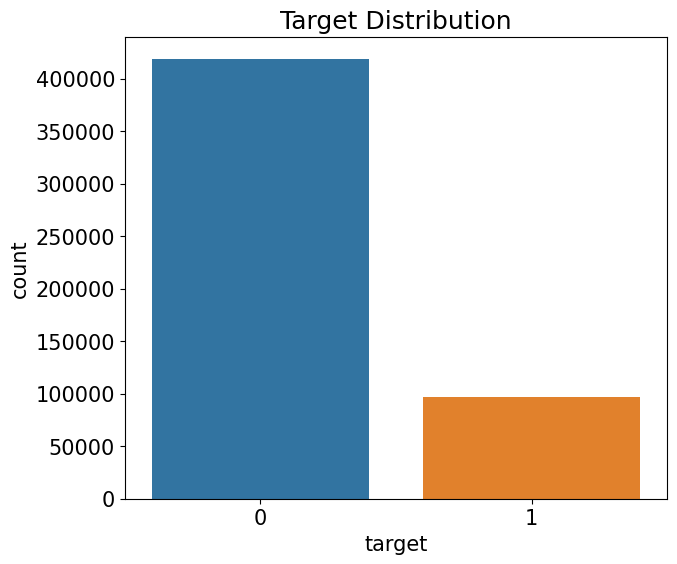

In [16]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15) # 폰트 크기 설정
plt.figure(figsize=(7, 6)) # Figure 크기 설정

# 타깃값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set(title='Target Distribution');

In [17]:
rectangle = ax.patches[0] # 첫 번째 Rectangle 객체
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 418990.0
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [18]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train)*0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 419505.548


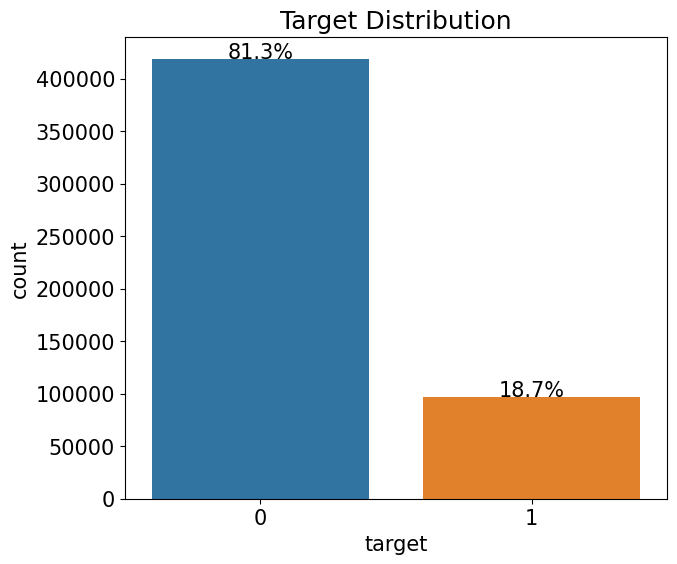

In [19]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

### 이진 피처 분포

[(0, 'bin_0'), (1, 'bin_1'), (2, 'bin_2'), (3, 'bin_3'), (4, 'bin_4')]


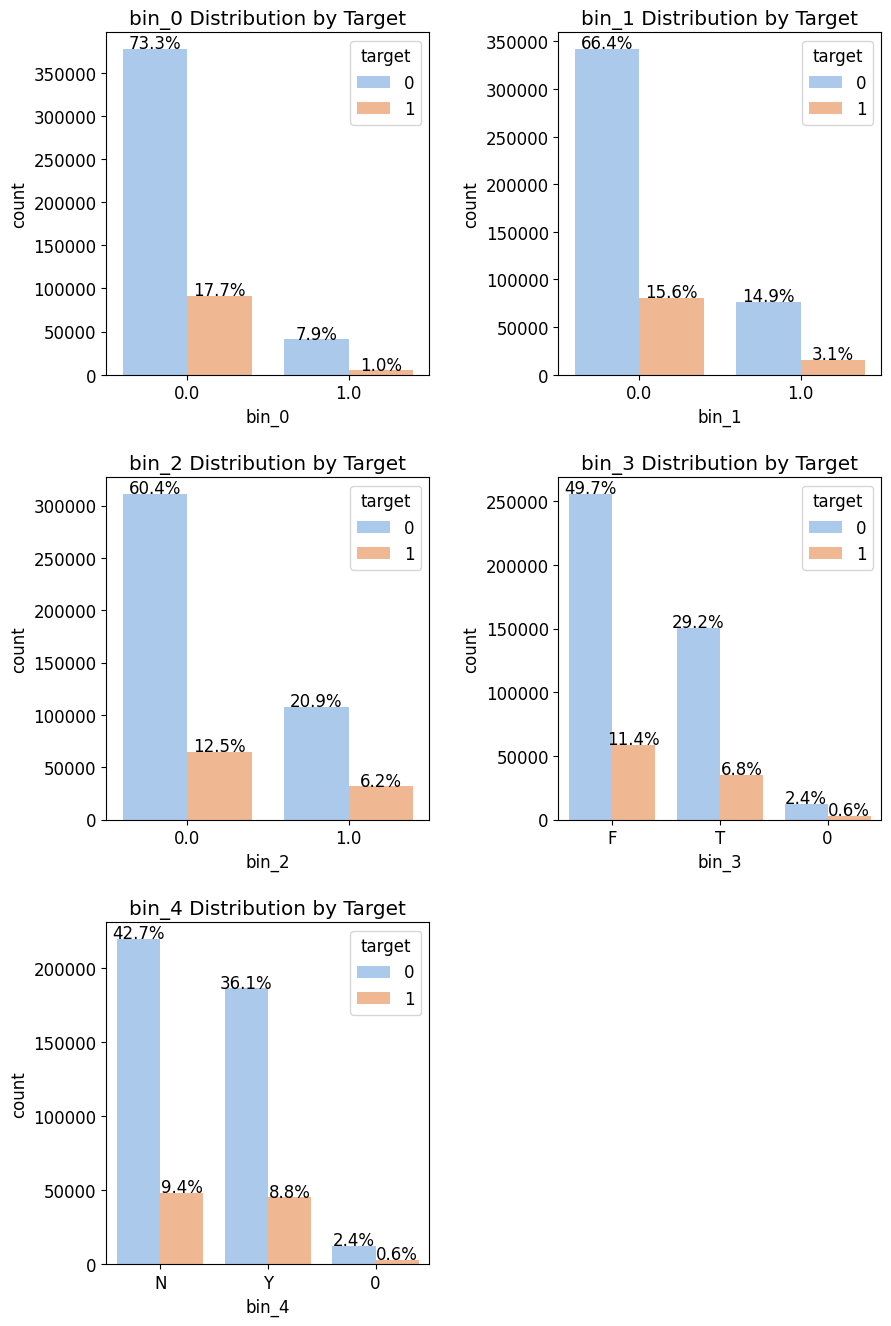

In [20]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록
print(list(enumerate(bin_features)))

for idx, feature in enumerate(bin_features): 
    
    ax = plt.subplot(grid[idx]) 
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))                     # 비율 표시
plt.savefig('그래프.png')

[(0, 'bin_0'), (1, 'bin_1'), (2, 'bin_2'), (3, 'bin_3'), (4, 'bin_4')]


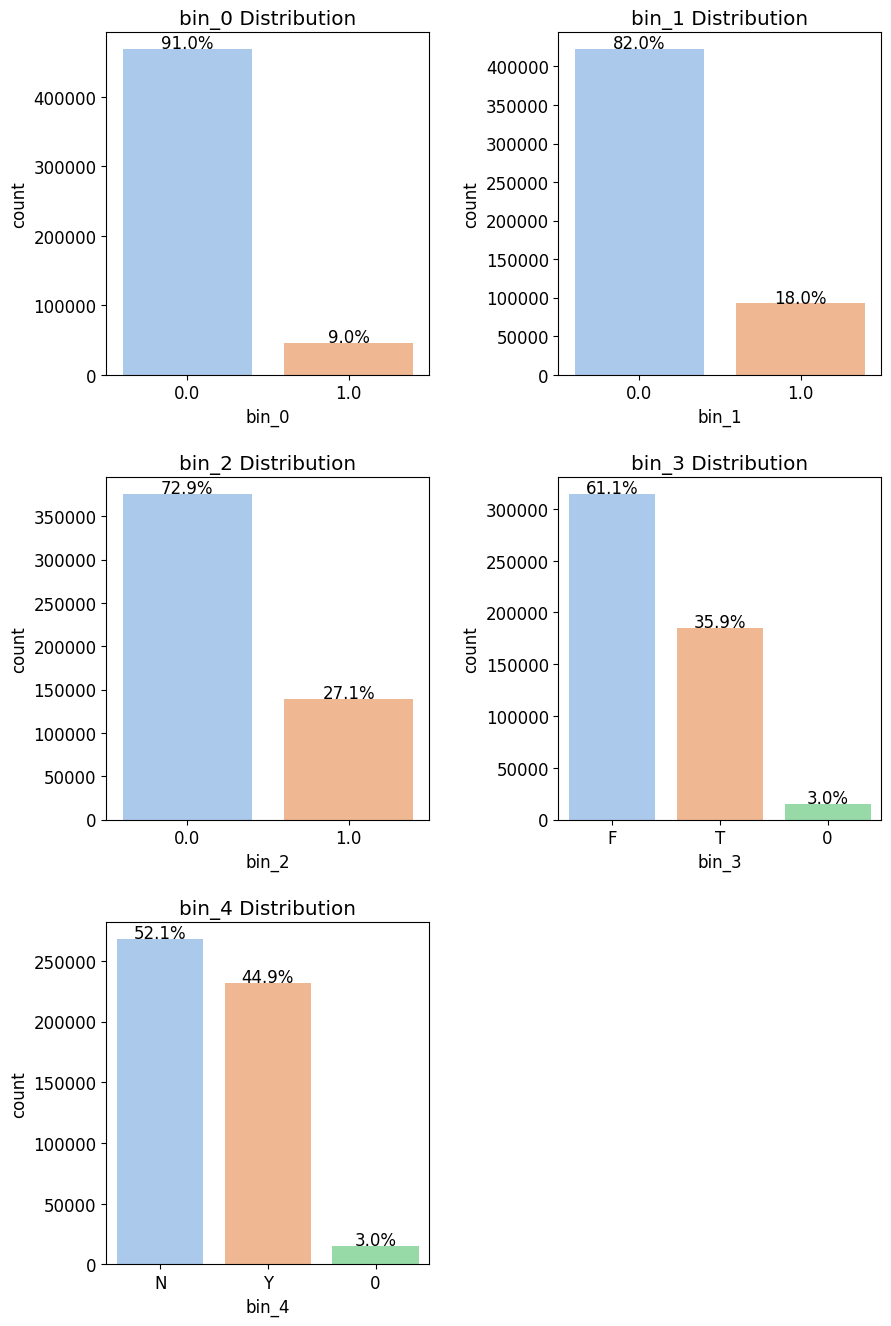

In [21]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록
print(list(enumerate(bin_features)))

for idx, feature in enumerate(bin_features): 
    
    ax = plt.subplot(grid[idx]) 
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)
    
    ax.set_title(f'{feature} Distribution') # 그래프 제목 설정
    write_percent(ax, len(train))                     # 비율 표시
plt.savefig('그래프.png')

### 명목형 피처 분포

In [22]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,142184,34646
Green,37031,8086
Red,227048,50937
red,12727,2889


In [23]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,80.407171,19.592829
Green,82.077709,17.922291
Red,81.676349,18.323651
red,81.499744,18.500256


In [24]:
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,80.407171,19.592829
1,Green,82.077709,17.922291
2,Red,81.676349,18.323651
3,red,81.499744,18.500256


In [25]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

위 코드는 다른 녀석들도 비율로 표기하고 싶을 때 사용한다

In [26]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,80.407171,19.592829
1,Green,82.077709,17.922291
2,Red,81.676349,18.323651
3,red,81.499744,18.500256


위에서 똑같은 결과로 나온 걸 볼 수 있다

포인트플롯 생성 함수 만들기 = 타깃값 1의 비율 나타내기

In [27]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black',label=str(feature))                  # 포인트플롯 색상                   # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

In [28]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시
       
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

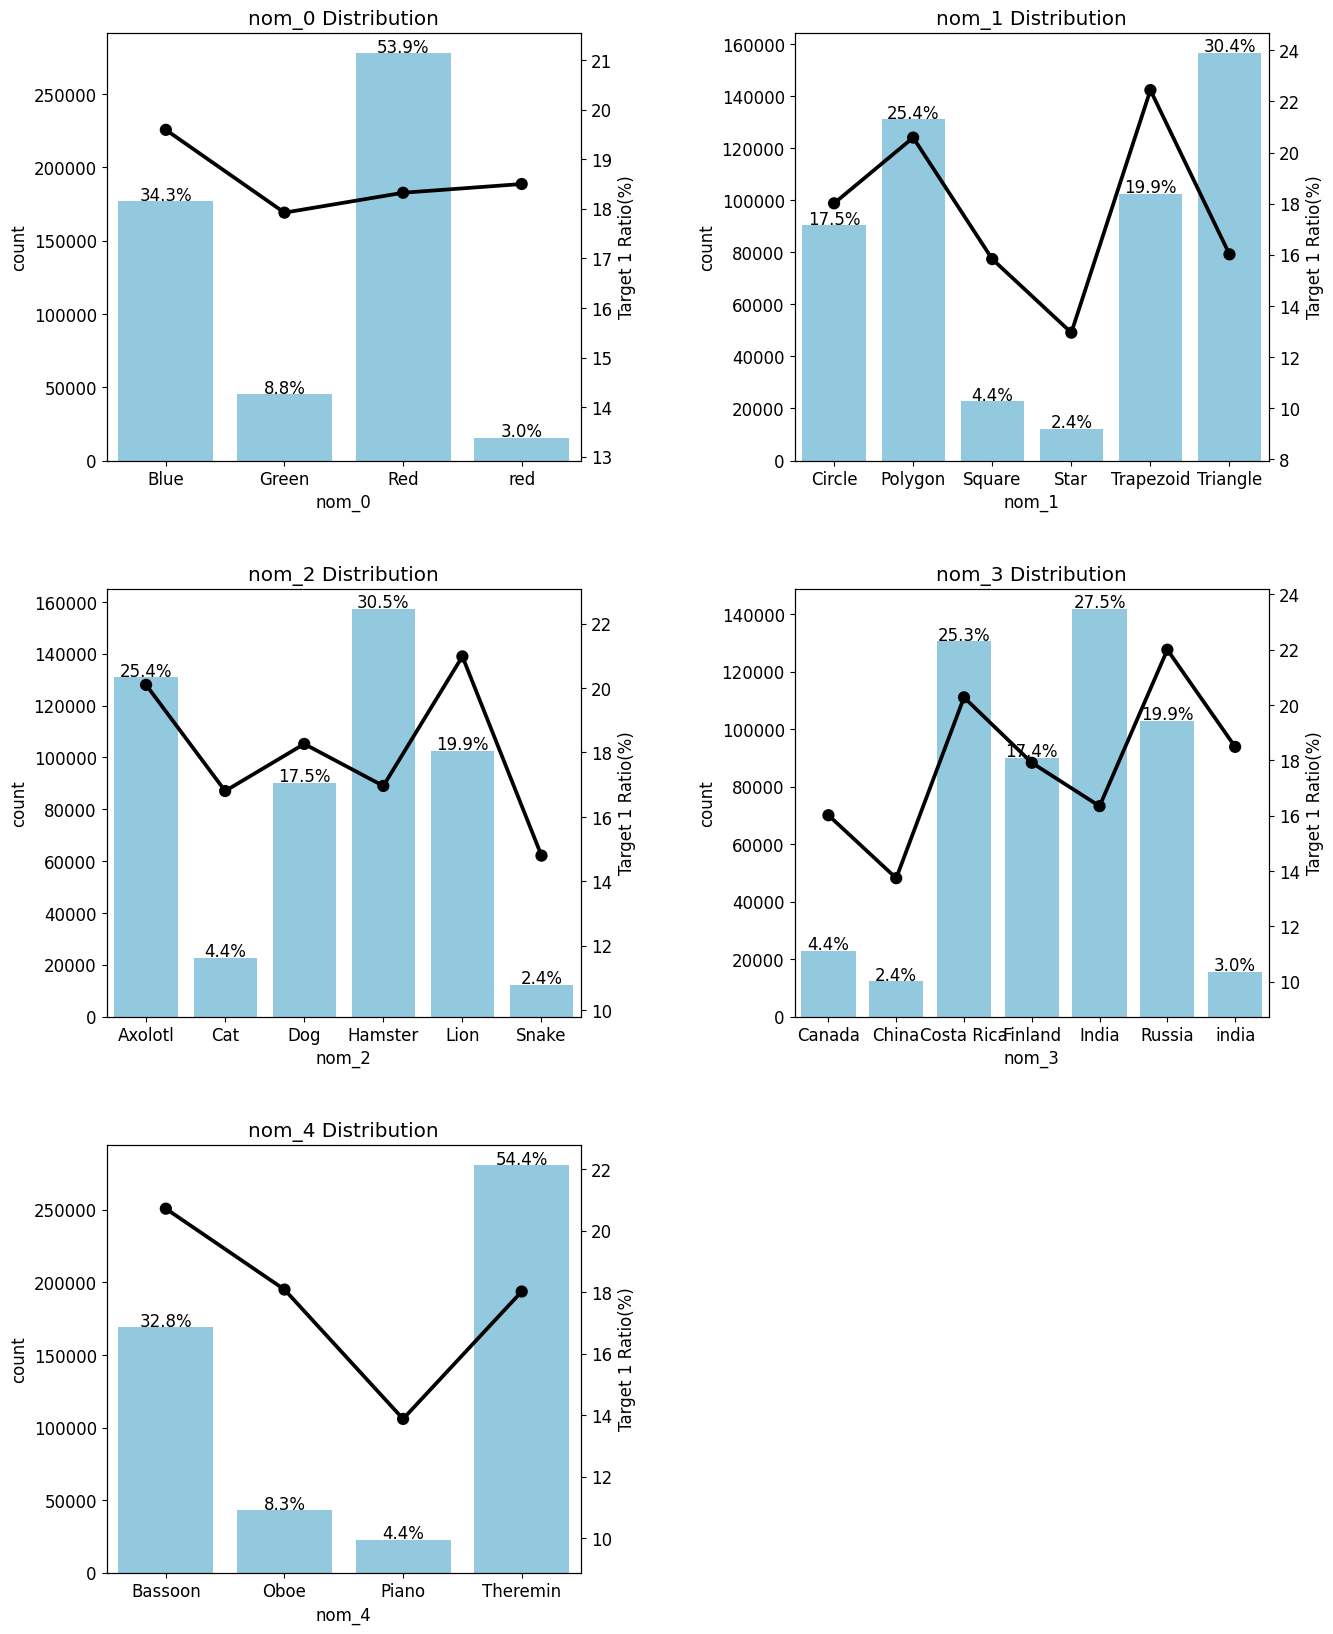

In [29]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)
plt.savefig('그래프2.png')

꺾은 선 그래프가 타깃값 1인 비율이다.

In [30]:
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

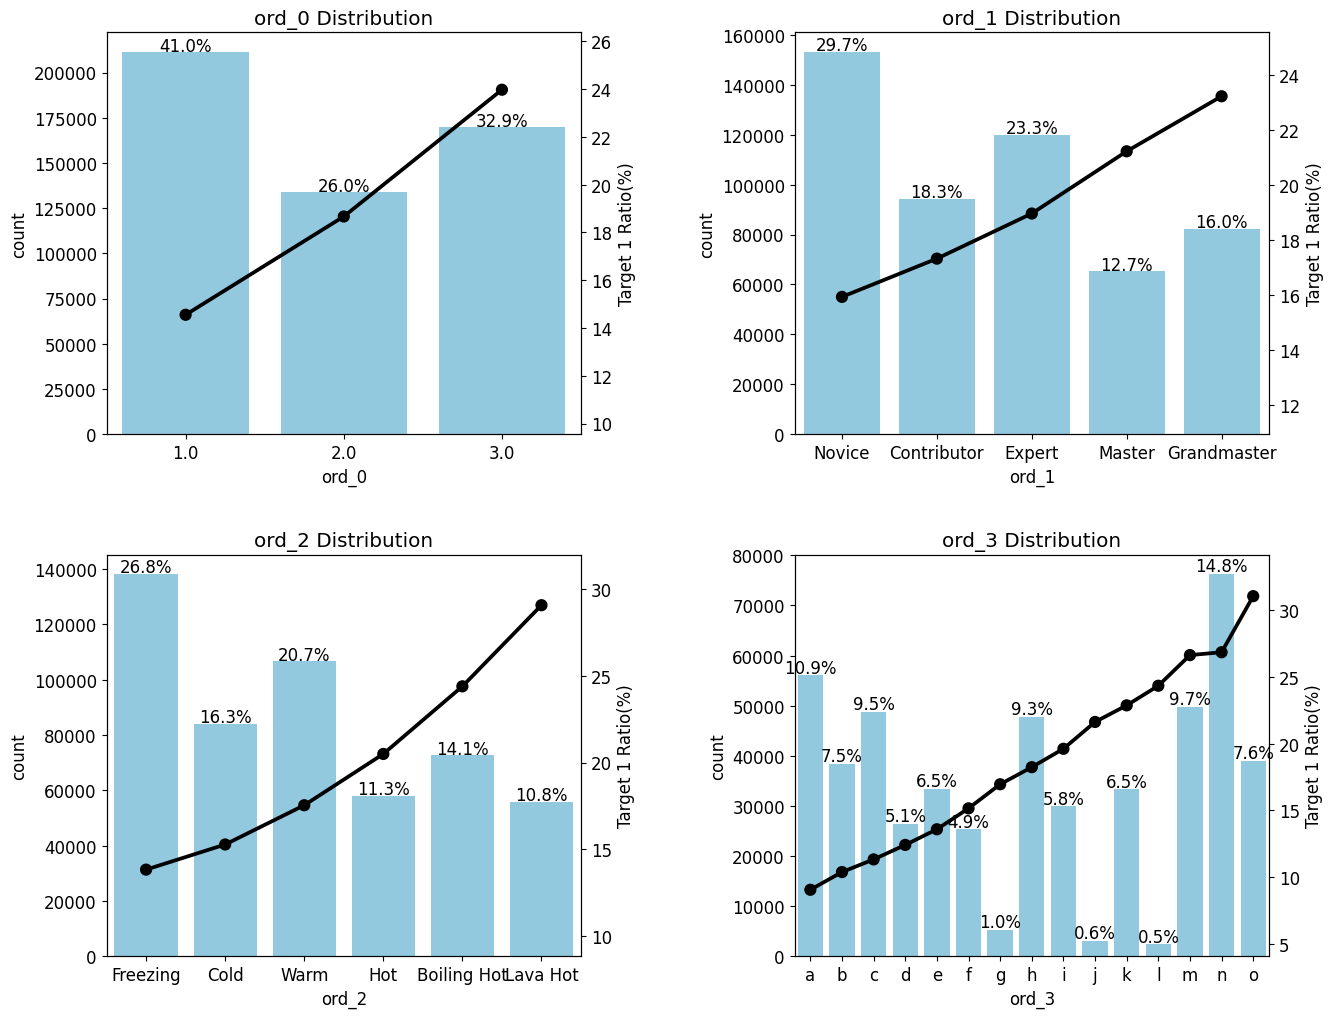

In [31]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))
plt.savefig('그래프3.png')

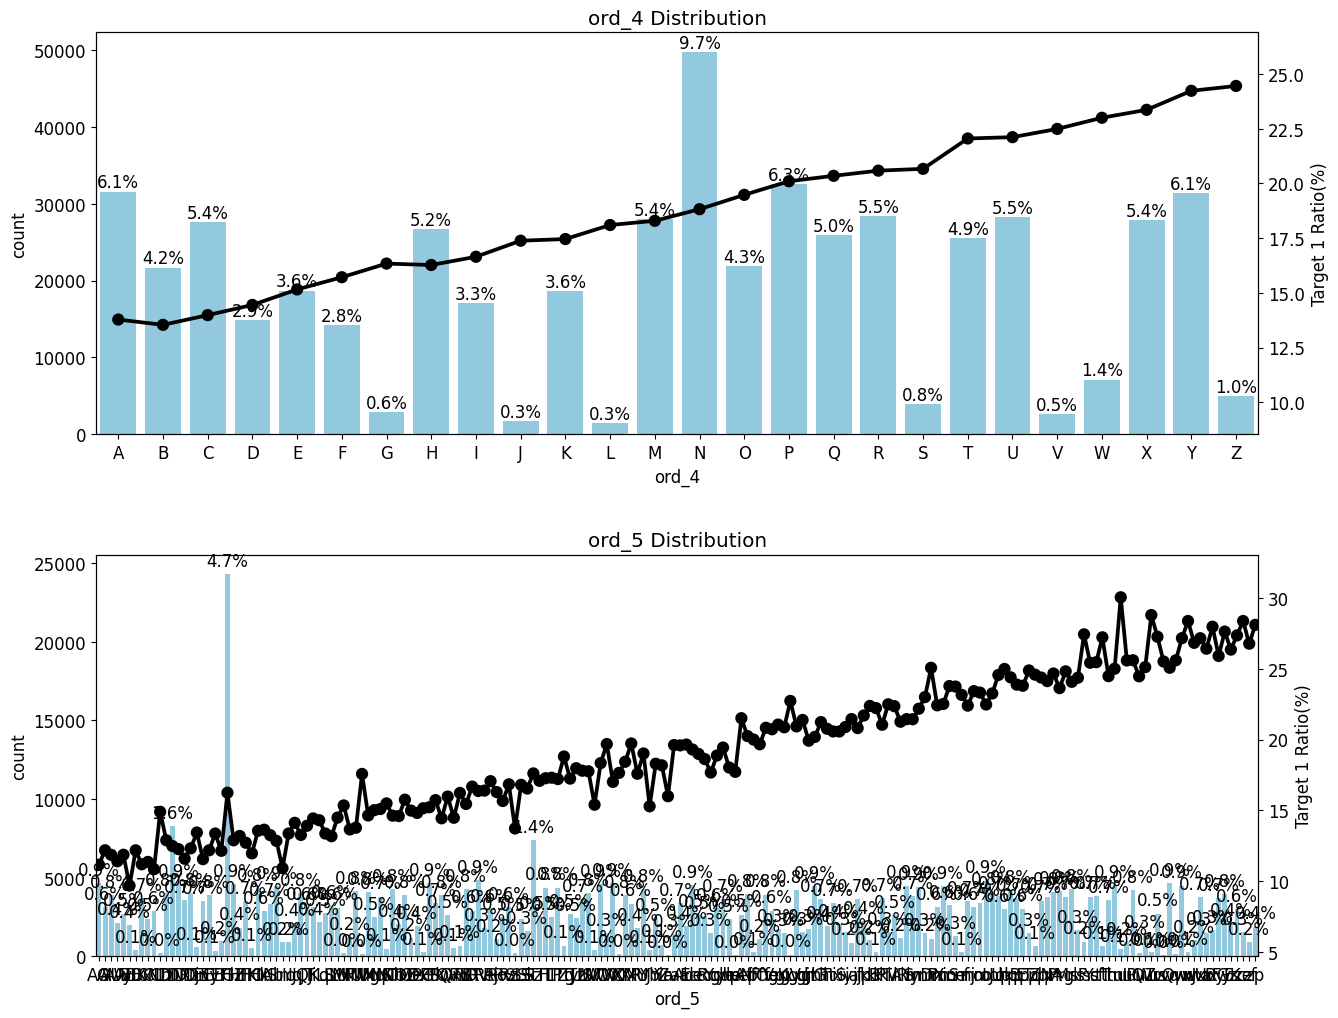

In [32]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 
                              num_rows=2, num_cols=1, size=(15, 12))
plt.savefig('그래프4.png')